In [1]:
import numpy as np
import time
import scipy.stats as stats
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)

In [2]:
import sklearn
print(sklearn.__version__)

0.21.3


In [3]:
import pickle

In [72]:
model = pickle.load(open('/home/guangya/Downloads/RF_model_max','rb'))

In [15]:
model.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [8]:
model.best_estimator_.feature_importances_

array([0.02629452, 0.02578387, 0.03451336, 0.03106555, 0.00981822,
       0.00860826, 0.0366341 , 0.03587256, 0.03631539, 0.03675893,
       0.03064472, 0.03111556, 0.03201555, 0.0316537 , 0.03407201,
       0.03598392, 0.03585484, 0.03363267, 0.03374397, 0.02898736,
       0.02450161, 0.02367823, 0.02390076, 0.02182437, 0.02463483,
       0.00266412, 0.02063995, 0.02651296, 0.02588299, 0.0213744 ,
       0.00038678, 0.0033449 , 0.00060412, 0.00165944, 0.00048802,
       0.0017847 , 0.00112839, 0.00137582, 0.00300273, 0.00033028,
       0.03377126, 0.        , 0.02563835, 0.02543598, 0.0267511 ,
       0.02421458, 0.02510029])

# Explore and extra data of particular periods of interest

In [2]:
data = pd.read_sas('/home/guangya/Downloads/wnv_2245new.sas7bdat') #Data from week 22 to 45, which is what i used for latter models

In [3]:
data.head() # Available features in the data set, More description is the final.xlsw file

,hexid,Input_FID,tempc,preci,yr,weeks,yrweeks,yrwksfid,templag1,templag2,...,wwpct,ehwpct,yr_hexid,Jantemp,PopYesNo,hpctpreww,hpctpostww,hpct7089,hpctpost90,income1
0,1.0,130.0,16.9758,6.046130,2005.0,22.0,b'200522',b'200522130',15.9957,13.7796,...,27.184466,0.0,"b'2005,1'",-3.815482,1.0,0.0,0.0,0.0,0.0,41.979816
1,1.0,130.0,25.3449,58.968242,2005.0,23.0,b'200523',b'200523130',16.9758,15.9957,...,27.184466,0.0,"b'2005,1'",-3.815482,1.0,0.0,0.0,0.0,0.0,41.979816
2,1.0,130.0,21.0872,15.114200,2005.0,24.0,b'200524',b'200524130',25.3449,16.9758,...,27.184466,0.0,"b'2005,1'",-3.815482,1.0,0.0,0.0,0.0,0.0,41.979816
3,1.0,130.0,22.3485,0.000000,2005.0,25.0,b'200525',b'200525130',21.0872,25.3449,...,27.184466,0.0,"b'2005,1'",-3.815482,1.0,0.0,0.0,0.0,0.0,41.979816
4,1.0,130.0,25.7740,6.371029,2005.0,26.0,b'200526',b'200526130',22.3485,21.0872,...,27.184466,0.0,"b'2005,1'",-3.815482,1.0,0.0,0.0,0.0,0.0,41.979816


In [58]:
data.isna().sum() # Check na

hexid               0
Input_FID           0
tempc               0
preci               0
yr                  0
weeks               0
yrweeks             0
yrwksfid            0
templag1            0
templag2            0
templag3            0
templag4            0
precilag1           0
precilag2           0
precilag3           0
precilag4           0
wnvbinary           0
mirmean             0
year           150510
mirlag1             0
mirlag2             0
mirlag3             0
mirlag4             0
totpop              0
whitepct            0
blackpct            0
asianpct            0
hispanicpct         0
Income              0
owpct               0
dospct              0
dlipct              0
dmipct              0
dhipct              0
blpct               0
dfpct               0
efpct               0
mfpct               0
shrubpct            0
glandpct            0
pasturepct          0
ccpct               0
wwpct               0
ehwpct              0
yr_hexid            0
Jantemp   

In [59]:
data = data.drop(columns=['Jantemp','Income','yrweeks','yrwksfid','yr_hexid','year']) # Drop year column so that so na appear

In [5]:
from sklearn.utils import class_weight

In [7]:
np.unique(y)

array([0., 1.])

In [ ]:
# include the parameter set we used for find the best model
# visulizae barplot with axis label and annnotate the black plot
# show results from bad models to good models

In [9]:
y

array([0., 0., 0., ..., 0., 0., 0.])

In [14]:
class_weights = class_weight.compute_class_weight('balanced' , classes=np.unique(y),y = y)

In [17]:
x = data.drop(columns=['wnvbinary','yrweeks','yrwksfid','yr_hexid','year']).values # Drop extra column
y = data['wnvbinary'].values

In [18]:
x = x.astype('float64')

In [19]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2, random_state = 1) # CV

In [8]:
# some spot check for data
data[data['hexid'] == 1431]['blackpct'].unique()

array([4.28479215])

In [9]:
data[data['hexid'] == 1831]['whitepct'].unique()

array([86.10261915])

In [10]:
data[data['hexid'] == 1831]['dmipct'].unique() 

array([14.42441054])

In [11]:
data[data['hexid'] == 3121]['income1'].unique() # The Geological and social data is likely a 10 year estimate here, which does not change from 2005-2016

array([100.88401563])

In [12]:
x = data[['yr','templag2','templag3','templag4','precilag2','mirlag1','mirlag2','mirlag3','mirlag4', 'whitepct','owpct','dmipct','dhipct']].values
# Data set for the best model described in paper, table5.
# However, random forest use a different feature selection algorithm 
# so that this might not be the optimal one for oue models. Since it's much slower to train all, I will use ALL features for further optimization later
y = data['wnvbinary'].values 
x = x.astype('float64')

In [41]:
from sklearn.metrics import roc_auc_score

In [14]:
trainX_total, testX_total, trainY_total, testY_total = train_test_split(x_total, y_total, test_size = 0.2, shuffle = True) # CV for all

NameError: name 'x_total' is not defined

# Test on Random Forest

In [42]:
def model_RF_test(model_RF, dataX, dataY):
    print("Model performance")
    predict_data = model_RF.predict_proba(dataX)
    
    # Some stats
    print("Feature Importantce : ")
    print(model_RF.feature_importances_)
#     print("Total number of WNV occurence in test set : " + str(len(dataY[dataY > 0])))
    
#     print("Number of WNV occurence the model is able to capture in test set:" + str(dataY[np.where(predict_data[:,1]  > 0)].sum()))
    
#     print("Expected number of WNV occurence of models aussume prediction is normally distributed : " + str(predict_data[:,1].mean() * len(predict_data)))
#     print("Log loss : " + str(log_loss(dataY,predict_data)))
    print(roc_auc_score(dataY,predict_data[:,1]))
    print("This is to test the performance of random forest model, ideally, the logloss is low and also it is able to capture most of the WNV occurence, and also it is neither over predicting" +  
          "nor under predicting")
    
    return None # Check how many wnv it predicts

In [43]:
model_RF_test(model_RF_best_2,testX_sel,testY_sel)

Model performance
Feature Importantce : 
[0.1350069  0.13302076 0.13470941 0.11855213 0.1247468  0.12406427
 0.11780009 0.11209965]
0.8575202766450342
This is to test the performance of random forest model, ideally, the logloss is low and also it is able to capture most of the WNV occurence, and also it is neither over predictingnor under predicting


In [17]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(trainX_total, trainY_total)
time_start = time.time()
model_RF1 = RandomForestClassifier(n_estimators=400,
                                 n_jobs = -1,
                                 max_features=None,
                                 max_depth= None,
                                 bootstrap=True,
                                class_weight='balanced'
                                 ) # Use undersampling to see if it worked
model_RF1.fit(X_resampled, y_resampled)
print("time consumed:", time.time() - time_start) 

Using TensorFlow backend.


time consumed: 3.264770030975342


In [60]:
model_RF_test(model_RF1,testX_total,testY_total) # The result tend to predict a lot of 1s, which is very biased.

Model performance
Feature Importantce : 
[0.00999531 0.01067965 0.01496773 0.01082702 0.0054172  0.02645585
 0.02794946 0.02833401 0.03969041 0.03359853 0.01333262 0.01407395
 0.01410982 0.01532784 0.02686748 0.13324849 0.11390923 0.11554932
 0.01995433 0.13395407 0.00646951 0.00946079 0.00790575 0.00963136
 0.00768387 0.00252334 0.01573296 0.01404953 0.01017898 0.01184233
 0.00080315 0.0024459  0.0021979  0.00341815 0.00042789 0.00192679
 0.00188718 0.00171914 0.00172571 0.00063831 0.02298358 0.
 0.01426518 0.01014777 0.01229566 0.01120487 0.00819208]
Total number of WNV occurence in test set : 173
Number of WNV occurence the model is able to capture in test set:173.0
Expected number of WNV occurence of models aussume prediction is normally distributed : 69593.33
Log loss : 0.4248442677492819
This is to test the performance of random forest model, ideally, the logloss is low and also it is able to capture most of the WNV occurence, and also it is neither over predictingnor under predi

In [20]:
np.argsort()

SyntaxError: invalid syntax (<ipython-input-20-be2c916f2ef5>, line 1)

In [37]:
data

,hexid,Input_FID,tempc,preci,yr,weeks,templag1,templag2,templag3,templag4,...,ccpct,wwpct,ehwpct,Jantemp,PopYesNo,hpctpreww,hpctpostww,hpct7089,hpctpost90,income1
0,1.0,130.0,16.975800,6.046130,2005.0,22.0,15.995700,13.779600,16.730600,9.073000,...,0.416089,27.184466,0.0,-3.815482,1.0,0.0,0.000000,0.000000,0.000000,41.979816
1,1.0,130.0,25.344900,58.968242,2005.0,23.0,16.975800,15.995700,13.779600,16.730600,...,0.416089,27.184466,0.0,-3.815482,1.0,0.0,0.000000,0.000000,0.000000,41.979816
2,1.0,130.0,21.087200,15.114200,2005.0,24.0,25.344900,16.975800,15.995700,13.779600,...,0.416089,27.184466,0.0,-3.815482,1.0,0.0,0.000000,0.000000,0.000000,41.979816
3,1.0,130.0,22.348500,0.000000,2005.0,25.0,21.087200,25.344900,16.975800,15.995700,...,0.416089,27.184466,0.0,-3.815482,1.0,0.0,0.000000,0.000000,0.000000,41.979816
4,1.0,130.0,25.774000,6.371029,2005.0,26.0,22.348500,21.087200,25.344900,16.975800,...,0.416089,27.184466,0.0,-3.815482,1.0,0.0,0.000000,0.000000,0.000000,41.979816
5,1.0,130.0,22.277000,3.417303,2005.0,27.0,25.774000,22.348500,21.087200,25.344900,...,0.416089,27.184466,0.0,-3.815482,1.0,0.0,0.000000,0.000000,0.000000,41.979816
6,1.0,130.0,24.915200,10.102133,2005.0,28.0,22.277000,25.774000,22.348500,21.087200,...,0.416089,27.184466,0.0,-3.815482,1.0,0.0,0.000000,0.000000,0.000000,41.979816
7,1.0,130.0,25.904900,18.433824,2005.0,29.0,24.915200,22.277000,25.774000,22.348500,...,0.416089,27.184466,0.0,-3.815482,1.0,0.0,0.000000,0.000000,0.000000,41.979816
8,1.0,130.0,23.836800,45.339948,2005.0,30.0,25.904900,24.915200,22.277000,25.774000,...,0.416089,27.184466,0.0,-3.815482,1.0,0.0,0.000000,0.000000,0.000000,41.979816
9,1.0,130.0,24.750600,5.782040,2005.0,31.0,23.836800,25.904900,24.915200,22.277000,...,0.416089,27.184466,0.0,-3.815482,1.0,0.0,0.000000,0.000000,0.000000,41.979816


In [88]:
data = data.drop(columns=['wnvbinary','yrweeks','yrwksfid','yr_hexid','year'])

In [16]:
data[['Income','income1']]

,Income,income1
0,41979.816406,41.979816
1,41979.816406,41.979816
2,41979.816406,41.979816
3,41979.816406,41.979816
4,41979.816406,41.979816
5,41979.816406,41.979816
6,41979.816406,41.979816
7,41979.816406,41.979816
8,41979.816406,41.979816
9,41979.816406,41.979816


In [5]:
1/47 # Mean importantce

0.02127659574468085

In [33]:
data.columns[[2,3,6,7,8,9,10,11,12,13,14,15,16,17,-7]] # If set cutoffs as 0.03, these are the dominant features for the model

Index(['tempc', 'preci', 'templag1', 'templag2', 'templag3', 'templag4',
       'precilag1', 'precilag2', 'precilag3', 'precilag4', 'mirmean',
       'mirlag1', 'mirlag2', 'mirlag3', 'Jantemp'],
      dtype='object')

In [12]:
data.columns[[4,5,25,26,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-6]] # unimportant Features that has importance less than 0.021, which is the mean importantce

Index(['yr', 'weeks', 'owpct', 'dospct', 'blpct', 'dfpct', 'efpct', 'mfpct',
       'shrubpct', 'glandpct', 'pasturepct', 'ccpct', 'wwpct', 'ehwpct',
       'PopYesNo'],
      dtype='object')

In [13]:
data.drop(columns=data.columns[[4,5,25,26,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-6]])# relatively important Features that has importance grater than 0.021

Index(['hexid', 'Input_FID', 'tempc', 'preci', 'templag1', 'templag2',
       'templag3', 'templag4', 'precilag1', 'precilag2', 'precilag3',
       'precilag4', 'mirmean', 'mirlag1', 'mirlag2', 'mirlag3', 'mirlag4',
       'totpop', 'whitepct', 'blackpct', 'asianpct', 'hispanicpct', 'Income',
       'dlipct', 'dmipct', 'dhipct', 'Jantemp', 'hpctpreww', 'hpctpostww',
       'hpct7089', 'hpctpost90', 'income1'],
      dtype='object')

In [ ]:
# Temp,precipatation, and mir is indeed most relevant than social economical features, but some social economical features are still useful in some extent.

In [16]:
# Add translation of features. Next step, train two models with smarter parameters and also taking a look at isda model and see if they have some inisght

In [19]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(trainX, trainY)
time_start = time.time()
model_RF2 = RandomForestClassifier(n_estimators=400,
                                 n_jobs = -1,
                                 max_features=None,
                                 max_depth= None,
                                 bootstrap=True,
                                class_weight='balanced'
                                 ) # Use undersampling to see if it worked
model_RF2.fit(X_resampled, y_resampled)
print("time consumed:", time.time() - time_start) 

time consumed: 1.166808843612671


In [61]:
model_RF_test(model_RF2,testX,testY) 

Model performance
Feature Importantce : 
[0.02332565 0.07673163 0.09381062 0.08244171 0.04115731 0.09283884
 0.32511096 0.03987311 0.05722872 0.04018178 0.02340537 0.06687365
 0.03702065]
Total number of WNV occurence in test set : 196
Number of WNV occurence the model is able to capture in test set:195.0
Expected number of WNV occurence of models aussume prediction is normally distributed : 73071.56249999999
Log loss : 0.42897848898311103
This is to test the performance of random forest model, ideally, the logloss is low and also it is able to capture most of the WNV occurence, and also it is neither over predictingnor under predicting


In [33]:
time_start = time.time()
model_RF3 = RandomForestClassifier(n_estimators=200,
                                 n_jobs = -1,
                                 max_features='sqrt',
                                 max_depth= 20,
                                 bootstrap=True,
                                   min_samples_leaf= 2,
                                class_weight='balanced'
                                 ) # Try more trees and see if calibration curve gets better
model_RF3.fit(trainX_total, trainY_total)
print("time consumed:", time.time() - time_start) 

time consumed: 307.3307168483734


In [88]:
x = sorted(model_RF3.feature_importances_)[::-1]
seq = [list(model_RF3.feature_importances_).index(v) for v in x]

In [91]:
seq[:10]

[15, 16, 17, 19, 8, 14, 18, 9, 7, 5]

In [57]:
model_RF_test(model_RF3,testX_total,testY_total)

Model performance
Feature Importantce : 
[1.30942271e-02 1.28020934e-02 2.92368487e-02 1.19465584e-02
 7.07868054e-03 4.19247572e-02 2.91652172e-02 4.69769293e-02
 6.08182076e-02 4.90170180e-02 1.13150864e-02 1.15022790e-02
 1.32276167e-02 1.27103614e-02 5.50808196e-02 9.72655123e-02
 7.87749447e-02 7.80864630e-02 5.01764878e-02 7.08532494e-02
 8.85207640e-03 9.74098519e-03 8.80785359e-03 1.12414583e-02
 9.87450040e-03 6.71593176e-03 1.24806795e-02 1.14679958e-02
 1.23319782e-02 1.02753625e-02 1.17618205e-03 8.00185418e-03
 9.13261608e-04 3.29746529e-03 4.22286487e-04 4.30764953e-03
 1.68786058e-03 9.07328043e-04 4.42005112e-03 7.72870641e-05
 2.79016966e-02 0.00000000e+00 1.64946315e-02 9.70867099e-03
 1.27331784e-02 1.49233092e-02 1.01851078e-02]
Total number of WNV occurence in test set : 173
Number of WNV occurence the model is able to capture in test set:165.0
Expected number of WNV occurence of models aussume prediction is normally distributed : 13746.057522374354
Log loss : 0.06

In [102]:
data.drop(columns=['wnvbinary','yrweeks','yrwksfid','yr_hexid','year']).columns

Index(['hexid', 'Input_FID', 'tempc', 'preci', 'yr', 'weeks', 'templag1',
       'templag2', 'templag3', 'templag4', 'precilag1', 'precilag2',
       'precilag3', 'precilag4', 'mirmean', 'mirlag1', 'mirlag2', 'mirlag3',
       'mirlag4', 'totpop', 'whitepct', 'blackpct', 'asianpct', 'hispanicpct',
       'Income', 'owpct', 'dospct', 'dlipct', 'dmipct', 'dhipct', 'blpct',
       'dfpct', 'efpct', 'mfpct', 'shrubpct', 'glandpct', 'pasturepct',
       'ccpct', 'wwpct', 'ehwpct', 'Jantemp', 'PopYesNo', 'hpctpreww',
       'hpctpostww', 'hpct7089', 'hpctpost90', 'income1'],
      dtype='object')

In [35]:
time_start = time.time()
model_RF4 = RandomForestClassifier(n_estimators=200,
                                 n_jobs = -1,
                                 max_features='sqrt',
                                 max_depth= 20,
                                 bootstrap=True,
                                   min_samples_leaf= 2,
                                class_weight='balanced'
                                 ) # Try more trees and see if calibration curve gets better
model_RF4.fit(trainX, trainY)
print("time consumed:", time.time() - time_start) 

time consumed: 218.0876429080963


In [62]:
model_RF_test(model_RF4,testX,testY)

Model performance
Feature Importantce : 
[0.02621741 0.08807811 0.09189799 0.09668619 0.03990629 0.14748003
 0.14935428 0.11992112 0.08589193 0.03846456 0.02059316 0.057597
 0.03791192]
Total number of WNV occurence in test set : 196
Number of WNV occurence the model is able to capture in test set:181.0
Expected number of WNV occurence of models aussume prediction is normally distributed : 13670.897052778864
Log loss : 0.06785630091527631
This is to test the performance of random forest model, ideally, the logloss is low and also it is able to capture most of the WNV occurence, and also it is neither over predictingnor under predicting


In [105]:
data[['yr','templag2','templag3','templag4','precilag2','mirlag1','mirlag2','mirlag3','mirlag4', 'whitepct','owpct','dmipct','dhipct']].columns

Index(['yr', 'templag2', 'templag3', 'templag4', 'precilag2', 'mirlag1',
       'mirlag2', 'mirlag3', 'mirlag4', 'whitepct', 'owpct', 'dmipct',
       'dhipct'],
      dtype='object')

In [104]:
data.drop(columns=['wnvbinary','yrweeks','yrwksfid','yr_hexid','year']).columns[[17,20,9,10,16,18]]

Index(['mirlag3', 'whitepct', 'templag4', 'precilag1', 'mirlag2', 'mirlag4'], dtype='object')

In [96]:
data[data.drop(columns=['wnvbinary','yrweeks','yrwksfid','yr_hexid','year']).columns[[7,8,9,10,15,16,17,20]]].head() # From the above 3 feature importance of models, we can manually select 
# about 7 features which is mostly important

,templag2,templag3,templag4,precilag1,mirlag1,mirlag2,mirlag3,whitepct
0,13.7796,16.7306,9.0730,0.019091,0.00000,0.00000,0.00000,65.74257
1,15.9957,13.7796,16.7306,6.046130,0.00000,0.00000,0.00000,65.74257
2,16.9758,15.9957,13.7796,58.968242,2.50278,0.00000,0.00000,65.74257
3,25.3449,16.9758,15.9957,15.114200,0.00000,2.50278,0.00000,65.74257
4,21.0872,25.3449,16.9758,0.000000,0.00000,0.00000,2.50278,65.74257


In [5]:
x_selected = data[data.drop(columns=['wnvbinary','yrweeks','yrwksfid','yr_hexid','year']).columns[[7,8,9,10,15,16,17,20]]]
y_selected = data['wnvbinary']

### From the above model, we can see that random forest, although is not very good, can actually capture someinformation. So we will try formal Cross validation on selected features and see if it gets betterz

## Pipnelines for later for wrok

In [7]:
trainX_sel, testX_sel, trainY_sel, testY_sel = train_test_split(x_selected.values, y_selected, test_size = 0.2, random_state = 1) # CV

## Find best model 1

In [39]:
time_start = time.time()
params_RF_grid_1 = {
    'n_estimators' : [500, 1000],
    'max_features' : [90, 'sqrt', None],
    'max_depth' : [10, None],
    'min_samples_leaf' : [1,2]
}
CV_model_RF_1 = GridSearchCV(model_RF, params_RF_grid_1, scoring='neg_log_loss',cv=5)
CV_model_RF_1.fit(x_selected, dataY)
print("time consumed:", time.time() - time_start)

time consumed: 6569.04248213768


In [40]:
CV_model_RF_1.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [41]:
CV_model_RF_1.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 1000}

In [18]:
time_start = time.time()
model_RF_best_1 = RandomForestClassifier(bootstrap= True, max_depth= 80, max_features= 'sqrt', min_samples_leaf= 5, min_samples_split= 8,n_estimators= 1000)
model_RF_best_1.fit(trainX,trainY)
print("Time consumed:", time.time() - time_start)

Time consumed: 31388.03477883339


In [19]:
model_RF_test(model_RF_best_1,testX,testY)

NameError: name 'model_RF_test' is not defined

## Find best model 2

In [ ]:
time_start = time.time()
params_RF_grid_2 = {
    'n_estimators' : [800, 1200],
    'max_features' : ['sqrt', 5],
    'min_samples_leaf' : [2,3]
}
CV_model_RF_2 = GridSearchCV(model_RF, params_RF_grid_2, cv=5)
CV_model_RF_2.fit(dataX, dataY)
print("time consumed:", time.time() - time_start)

In [24]:
CV_model_RF_2.fit(dataX, dataY)

KeyboardInterrupt: 

In [10]:
time_start = time.time()
model_RF_best_2 = RandomForestClassifier(n_estimators=1000,
                                 n_jobs = -1,
                                 max_features='sqrt',
                                 max_depth=80,
                                 bootstrap=True,
                                 min_samples_leaf=5,
                                min_samples_split = 8
                                 )
model_RF_best_2.fit(trainX_sel, trainY_sel)
print("Time consumed:", time.time() - time_start)

Time consumed: 1184.6178953647614


## Find best model 3

In [12]:
time_start = time.time()
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, None, 110],
    'max_features': ['sqrt', 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [500, 2000, 4000, 1000]
}
CV_model_RF_3 = GridSearchCV(model_RF_best_2, params_RF_grid_3, cv=5)
CV_model_RF_3.fit(dataX, dataY)
print("time consumed:", time.time() - time_start)

time consumed: 998.9455091953278


In [13]:
CV_model_RF_3.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=3000,
                      n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [14]:
CV_model_RF_3.best_params_

{'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 3000}

In [51]:
time_start = time.time()
model_RF_best_3 = RandomForestRegressor(n_estimators=8000,
                                 criterion="mse",
                                 n_jobs = -1,
                                 max_features="log2",
                                 max_depth=None,
                                 bootstrap=True,
                                 min_samples_leaf=2
                                 )
model_RF_best_3.fit(trainX_sel, trainY)
print("Time consumed:", time.time() - time_start)

Time consumed: 45.644662857055664


In [34]:
model_RF_test(model_RF_best_2,testX_sel,testY_sel)

Model performance
Feature Importance : 
[0.1350069  0.13302076 0.13470941 0.11855213 0.1247468  0.12406427
 0.11780009 0.11209965]
Total number of WNV occurrence in test set : 164
Log loss : 0.005276678070004666
This is to test the performance of random forest model, ideally, the logloss is low and also it is able to capture most of the WNV occurrence


In [15]:
from sklearn.inspection import plot_partial_dependence

In [38]:
from sklearn.metrics import auc

In [33]:
from sklearn.metrics

In [16]:
data.columns

Index(['hexid', 'Input_FID', 'tempc', 'preci', 'yr', 'weeks', 'yrweeks',
       'yrwksfid', 'templag1', 'templag2', 'templag3', 'templag4', 'precilag1',
       'precilag2', 'precilag3', 'precilag4', 'wnvbinary', 'mirmean', 'year',
       'mirlag1', 'mirlag2', 'mirlag3', 'mirlag4', 'totpop', 'whitepct',
       'blackpct', 'asianpct', 'hispanicpct', 'Income', 'owpct', 'dospct',
       'dlipct', 'dmipct', 'dhipct', 'blpct', 'dfpct', 'efpct', 'mfpct',
       'shrubpct', 'glandpct', 'pasturepct', 'ccpct', 'wwpct', 'ehwpct',
       'yr_hexid', 'Jantemp', 'PopYesNo', 'hpctpreww', 'hpctpostww',
       'hpct7089', 'hpctpost90', 'income1'],
      dtype='object')

In [160]:
data[data['wnvbinary'] > 0].whitepct.mean()

68.68418209741776

In [161]:
data.whitepct.mean()

67.25160481816195

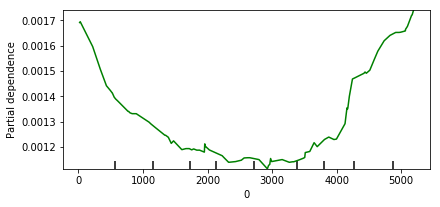

In [19]:
features = [0]
plot_partial_dependence(model, trainX[:100], features) 

In [87]:
(trainY == 1).sum() / (trainY == 0).sum()

0.0006327990754727597

In [73]:
data

,hexid,Input_FID,tempc,preci,yr,weeks,templag1,templag2,templag3,templag4,...,pasturepct,ccpct,wwpct,ehwpct,PopYesNo,hpctpreww,hpctpostww,hpct7089,hpctpost90,income1
0,1.0,130.0,16.975800,6.046130,2005.0,22.0,15.995700,13.779600,16.730600,9.073000,...,11.234397,0.416089,27.184466,0.0,1.0,0.0,0.000000,0.000000,0.000000,41.979816
1,1.0,130.0,25.344900,58.968242,2005.0,23.0,16.975800,15.995700,13.779600,16.730600,...,11.234397,0.416089,27.184466,0.0,1.0,0.0,0.000000,0.000000,0.000000,41.979816
2,1.0,130.0,21.087200,15.114200,2005.0,24.0,25.344900,16.975800,15.995700,13.779600,...,11.234397,0.416089,27.184466,0.0,1.0,0.0,0.000000,0.000000,0.000000,41.979816
3,1.0,130.0,22.348500,0.000000,2005.0,25.0,21.087200,25.344900,16.975800,15.995700,...,11.234397,0.416089,27.184466,0.0,1.0,0.0,0.000000,0.000000,0.000000,41.979816
4,1.0,130.0,25.774000,6.371029,2005.0,26.0,22.348500,21.087200,25.344900,16.975800,...,11.234397,0.416089,27.184466,0.0,1.0,0.0,0.000000,0.000000,0.000000,41.979816
5,1.0,130.0,22.277000,3.417303,2005.0,27.0,25.774000,22.348500,21.087200,25.344900,...,11.234397,0.416089,27.184466,0.0,1.0,0.0,0.000000,0.000000,0.000000,41.979816
6,1.0,130.0,24.915200,10.102133,2005.0,28.0,22.277000,25.774000,22.348500,21.087200,...,11.234397,0.416089,27.184466,0.0,1.0,0.0,0.000000,0.000000,0.000000,41.979816
7,1.0,130.0,25.904900,18.433824,2005.0,29.0,24.915200,22.277000,25.774000,22.348500,...,11.234397,0.416089,27.184466,0.0,1.0,0.0,0.000000,0.000000,0.000000,41.979816
8,1.0,130.0,23.836800,45.339948,2005.0,30.0,25.904900,24.915200,22.277000,25.774000,...,11.234397,0.416089,27.184466,0.0,1.0,0.0,0.000000,0.000000,0.000000,41.979816
9,1.0,130.0,24.750600,5.782040,2005.0,31.0,23.836800,25.904900,24.915200,22.277000,...,11.234397,0.416089,27.184466,0.0,1.0,0.0,0.000000,0.000000,0.000000,41.979816


In [ ]:
x.drop(columns=x.columns[[4, 5, 25, 26, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -6]])

In [110]:
from random import sample

In [115]:
np.random.shuffle(trainX)

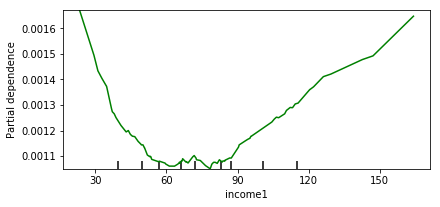

In [116]:
features = [46]
plot_partial_dependence(model, trainX[:100], features, feature_names=data.drop(columns=['wnvbinary','yrweeks','yrwksfid','yr_hexid','year']).columns) 

In [119]:
np.random.shuffle(trainX)

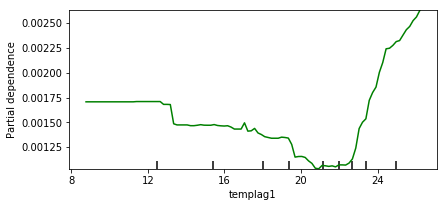

In [117]:
features = [6]
plot_partial_dependence(model, trainX[:100], features,feature_names=data.drop(columns=['wnvbinary','yrweeks','yrwksfid','yr_hexid','year']).columns) 

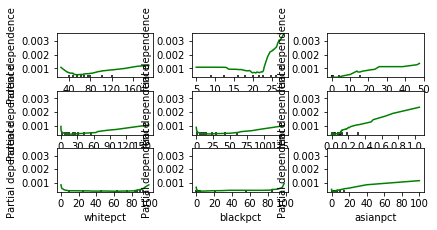

In [141]:
features = [46,6,15,10,11,19,20,21,22]
plot_partial_dependence(model, trainX[:80], features, feature_names=data.drop(columns=['wnvbinary','yrweeks','yrwksfid','yr_hexid','year']).columns) 

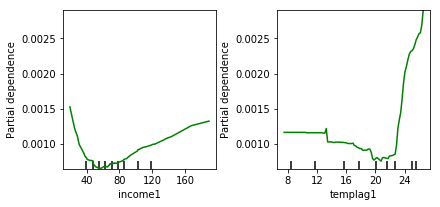

In [138]:
features = [46,6,15,10,11,19,20,21,22]
plot_partial_dependence(model, trainX[:100], features, feature_names=data.drop(columns=['wnvbinary','yrweeks','yrwksfid','yr_hexid','year']).columns) 

In [118]:
np.random.shuffle(trainX)

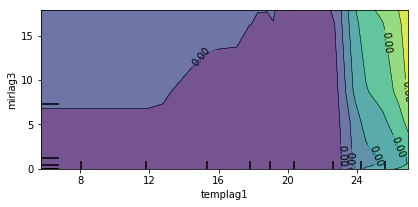

In [122]:
features = [(24,17)]
plot_partial_dependence(model, trainX[:30], features,feature_names=data.drop(columns=['wnvbinary','yrweeks','yrwksfid','yr_hexid','year']).columns) 

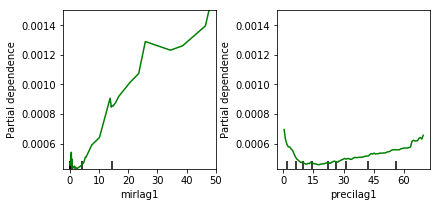

In [139]:
features = [15,10]
plot_partial_dependence(model, trainX[:100], features,feature_names=data.drop(columns=['wnvbinary','yrweeks','yrwksfid','yr_hexid','year']).columns) 

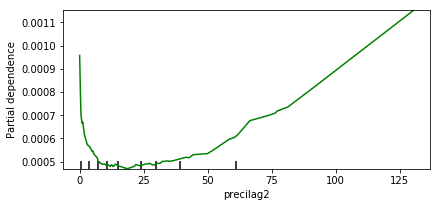

In [126]:
features = [11]
plot_partial_dependence(model, trainX[:100], features,feature_names=data.drop(columns=['wnvbinary','yrweeks','yrwksfid','yr_hexid','year']).columns) 

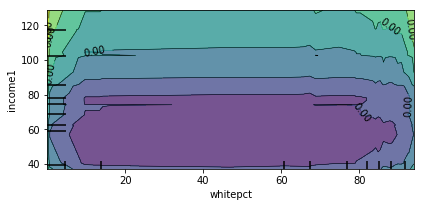

In [137]:
features = [(20,46)]
plot_partial_dependence(model, trainX[:30], features,feature_names=data.drop(columns=['wnvbinary','yrweeks','yrwksfid','yr_hexid','year']).columns) 

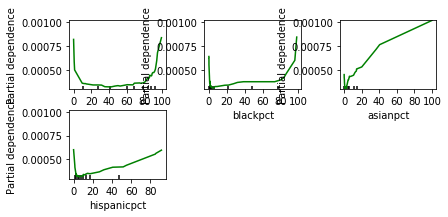

In [148]:
features = [20,21,22,23]
plot_partial_dependence(model, trainX[:50], features,feature_names=data.drop(columns=['wnvbinary','yrweeks','yrwksfid','yr_hexid','year']).columns) 

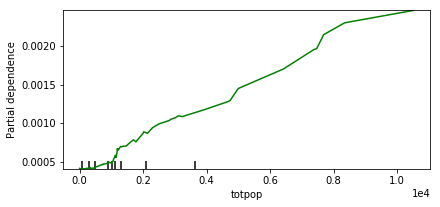

In [130]:
features = [19]
plot_partial_dependence(model, trainX[:100], features,feature_names=data.drop(columns=['wnvbinary','yrweeks','yrwksfid','yr_hexid','year']).columns) 

In [52]:
from scipy import stats

In [87]:
data.astype('float')

ValueError: could not convert string to float: b'2005,1'

In [89]:
data_wnv = data[data.wnvbinary == 1]

AttributeError: 'DataFrame' object has no attribute 'wnvbinary'

In [90]:
data_0 = data[data.wnvbinary == 0]

AttributeError: 'DataFrame' object has no attribute 'wnvbinary'

In [67]:
data.columns[-7]

'ehwpct'

In [70]:
data_wnv.asianpct.mean()

7.045011135560733

In [71]:
data_0.asianpct.mean()

7.37278024421255

In [86]:
for x in data.columns:
    print(x + ': ' + str(stats.ks_2samp(data_wnv[x], data_0[x])[1]))

hexid: 6.173820128326637e-23
Input_FID: 6.173820128326637e-23
tempc: 4.86664555362853e-50
preci: 0.1610149639838622
yr: 8.115466302777349e-25
weeks: 5.424348227645927e-82
yrweeks: 2.859524496674598e-30
yrwksfid: 1.7106815328781894e-30
templag1: 5.553095060099412e-93
templag2: 5.621102894863635e-131
templag3: 1.2433454527497459e-163
templag4: 7.44418317262221e-181
precilag1: 0.1604137622969023
precilag2: 0.5644103481593911
precilag3: 0.14449030624211207
precilag4: 0.042752041558668
wnvbinary: 0.0
mirmean: 3.8312348357555006e-196


TypeError: '<' not supported between instances of 'bytes' and 'float'

In [62]:
stats.ks_2samp(data_wnv.tempc, data_0.tempc)

Ks_2sampResult(statistic=0.25166617771767663, pvalue=4.86664555362853e-50)

In [2]:
import numpy as np
import time
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import log_loss
import pickle
from sklearn.utils import class_weight

"""
This code fits the Random Forest model. Cross validation is preformed in another
script.
"""

time_start = time.time()
data = pd.read_sas('/home/guangya/Downloads/wnv_2245new.sas7bdat')  # In the Cook_Dupage Directory
print("Data read in:", time.time() - time_start)

time_start = time.time()
x = data.drop(columns=['wnvbinary', 'yrweeks', 'yrwksfid', 'yr_hexid', 'year'])

x_selected = x.drop(columns=x.columns[[4, 5, 25, 26, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -6]]).values
y_selected = data['wnvbinary'].values
x = data.drop(columns=['wnvbinary', 'yrweeks', 'yrwksfid', 'yr_hexid', 'year'])
time_start = time.time()
trainX_sel, testX_sel, trainY_sel, testY_sel = train_test_split(x_selected, y_selected, test_size=0.2, random_state=1) # CV
print("data split:", time.time() - time_start)
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_selected), y=y_selected)
time_start = time.time()
model_RF_best_2 = RandomForestClassifier(n_estimators=1000,
                                         n_jobs=-1,
                                         max_features=5,
                                         max_depth=60,
                                         min_samples_leaf = 5,
                                         min_samples_split = 8,
                                         bootstrap=True,
                                         min_samples_leaf=2)
print("Classifier established:", time.time() - time_start)


time_start = time.time()
model_RF_best_2.fit(trainX_sel, trainY_sel)
print("model fit:", time.time() - time_start)

pickle.dump(model_RF_best_2, open('/home/jallen17/CPRHD_SES/RF_model_fit', 'wb'))
print("Fitting complete. Model saved as RF_model_fit")

Data read in: 19.950990200042725


In [22]:
import numpy as np
import time
import scipy.stats as stats
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.inspection import plot_partial_dependence
import pickle

Time consumed: 7.382957458496094


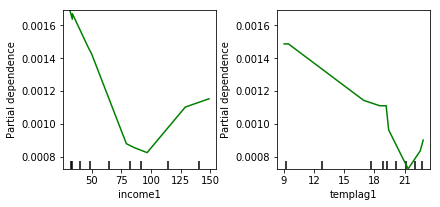

In [29]:
from matplotlib import pyplot as plt
fig_1 = plt.figure()
time_start = time.time()
features = [46,6]
plot_partial_dependence(model, trainX[:10], features, feature_names=data.drop(columns=['wnvbinary','yrweeks','yrwksfid','yr_hexid','year']).columns, fig= fig_1)
fig_1.savefig('result1.png')
print("Time consumed:", time.time() - time_start)

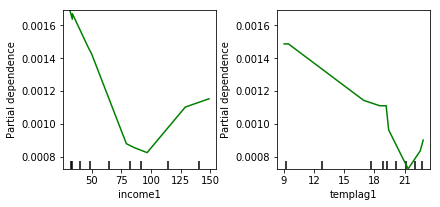

In [30]:
fig_1

In [6]:
x = data.drop(columns=['wnvbinary', 'yrweeks', 'yrwksfid', 'yr_hexid', 'year'])
y_selected = data['wnvbinary'].values

In [37]:
x_selected = x[x.drop(columns=x.columns[[4, 5, 25, 26, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -6]]).columns[[5,6,7,12,13,14,15,16,17]]]

In [31]:
time_start = time.time();
trainX_sel, testX_sel, trainY_sel, testY_sel = train_test_split(x_selected, y_selected, test_size=0.2, random_state=1) # CV
print("data split:", time.time() - time_start)
# classweights = class_weight.compute_class_weight('balanced', classes=np.unique(y_selected), y=y_selected)
model_RF_best_2 = RandomForestClassifier(n_estimators=1000,
                                         n_jobs=-1,
                                         max_features=5,
                                         max_depth=60,
                                         min_samples_leaf = 5,
                                         min_samples_split = 8,
                                         class_weight = 'balanced',
                                         bootstrap=True)
print("Classifier established:", time.time() - time_start)

model_RF_best_2.fit(trainX_sel, trainY_sel)
print("model fit:", time.time() - time_start)

# pickle.dump(model_RF_best_2, open('/home/jallen17/CPRHD_SES/RF_model_fit', 'wb'))
print("Fitting complete. Model saved as RF_model_fit")


data split: 0.31789064407348633
Classifier established: 0.34458303451538086
model fit: 1428.9829728603363
Fitting complete. Model saved as RF_model_fit


In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

"""
This script generates the stats of the model created in RF_model.py
"""

def model_RF_test(model_RF, dataX, dataY):
    print("Model performance")
    predict_data = model_RF.predict_proba(dataX)

    # Some stats
    print("Feature Importance : ")
    print(model_RF.feature_importances_) #older version of sklearn
    print("Total number of WNV occurrence in test set : " + str(len(dataY[dataY > 0])))

    print("Number of WNV occurrence the model is able to capture in test set:" + str(
        dataY[np.where(predict_data[:, 1] > 0)].sum()))

    print("Log loss : " + str(log_loss(dataY, predict_data)))

    print("AUC: " + str(roc_auc_score(dataY, predict_data[:,1])))

    print(
        "This is to test the performance of random forest model, ideally, the logloss is low and also it is able to "
        "capture most of the WNV occurrence")

    return None  # Check how many wnv it predicts

In [48]:
model_RF_test(model_RF_best_2,testX_sel,testY_sel)

Model performance
Feature Importance : 
[0.0254847  0.02628536 0.03968354 0.03234297 0.04033901 0.04062004
 0.03852613 0.03964226 0.03300042 0.03262355 0.03382761 0.03316316
 0.03678188 0.03999873 0.0397382  0.03595564 0.03741419 0.03260765
 0.02486986 0.02308054 0.02620027 0.02138957 0.02421615 0.0271683
 0.02638414 0.02029176 0.03694227 0.02702404 0.02626332 0.02855582
 0.0254337  0.02414523]
Total number of WNV occurrence in test set : 164
Number of WNV occurrence the model is able to capture in test set:145.0
Log loss : 0.005757539182538623
AUC: 0.8671922397043068
This is to test the performance of random forest model, ideally, the logloss is low and also it is able to capture most of the WNV occurrence


In [69]:
model_RF_test(model_RF_best_2,testX_sel,testY_sel)

Model performance
Feature Importance : 
[0.01614363 0.01622799 0.03093107 0.01495544 0.03172544 0.04808369
 0.05496753 0.05765391 0.01534484 0.01468481 0.0162172  0.01689561
 0.06089175 0.09017915 0.10104688 0.07161704 0.05407154 0.07774086
 0.01202232 0.01476139 0.01320798 0.01252236 0.01139978 0.01379857
 0.01708992 0.01204972 0.02921324 0.01785117 0.01257198 0.01362126
 0.01874271 0.01176921]
Total number of WNV occurrence in test set : 164
Number of WNV occurrence the model is able to capture in test set:139.0
Log loss : 0.011532698925243435
AUC: 0.8698493876090913
This is to test the performance of random forest model, ideally, the logloss is low and also it is able to capture most of the WNV occurrence


In [71]:
model_RF_test(model_RF_best_2,testX_sel,testY_sel)

Model performance
Feature Importance : 
[0.01627853 0.0146672  0.02978688 0.01662408 0.03112001 0.04905195
 0.05758159 0.04267969 0.01521216 0.01448492 0.01681771 0.01623016
 0.06199985 0.09816655 0.09632129 0.06839557 0.06135593 0.08473164
 0.01128123 0.01459966 0.01305693 0.01255448 0.01102452 0.01426649
 0.01735529 0.0117948  0.02729685 0.01917984 0.01232361 0.01326464
 0.01879035 0.01170561]
Total number of WNV occurrence in test set : 164
Number of WNV occurrence the model is able to capture in test set:121.0
Log loss : 0.013481441517724407
AUC: 0.8279789242133737
This is to test the performance of random forest model, ideally, the logloss is low and also it is able to capture most of the WNV occurrence


In [81]:
model_RF_test(model,testX,testY)

Model performance
Feature Importance : 
[0.02629452 0.02578387 0.03451336 0.03106555 0.00981822 0.00860826
 0.0366341  0.03587256 0.03631539 0.03675893 0.03064472 0.03111556
 0.03201555 0.0316537  0.03407201 0.03598392 0.03585484 0.03363267
 0.03374397 0.02898736 0.02450161 0.02367823 0.02390076 0.02182437
 0.02463483 0.00266412 0.02063995 0.02651296 0.02588299 0.0213744
 0.00038678 0.0033449  0.00060412 0.00165944 0.00048802 0.0017847
 0.00112839 0.00137582 0.00300273 0.00033028 0.03377126 0.
 0.02563835 0.02543598 0.0267511  0.02421458 0.02510029]
Total number of WNV occurrence in test set : 164
Number of WNV occurrence the model is able to capture in test set:153.0
Log loss : 0.004998724097310009
AUC: 0.8833544941601778
This is to test the performance of random forest model, ideally, the logloss is low and also it is able to capture most of the WNV occurrence


In [14]:
model_RF_test(model_RF_best_2,testX_sel,testY_sel) # balanced weight

Model performance
Feature Importance : 
[0.04450158 0.03212736 0.05494166 0.06358434 0.07110345 0.06582303
 0.03237119 0.03264937 0.03705063 0.03516511 0.07657654 0.13226312
 0.16048236 0.10754546 0.05381481]
Total number of WNV occurrence in test set : 164
Number of WNV occurrence the model is able to capture in test set:131.0
Log loss : 0.00879783797304522
AUC: 0.8315227135075282
This is to test the performance of random forest model, ideally, the logloss is low and also it is able to capture most of the WNV occurrence


In [16]:
model_RF_test(model_RF_best_2,testX_sel,testY_sel) # unbalanced 

Model performance
Feature Importance : 
[0.06765598 0.06108147 0.06982604 0.06952763 0.06754599 0.07000402
 0.06338296 0.06118976 0.06161672 0.06219632 0.06572504 0.07107777
 0.07114906 0.06702669 0.07099455]
Total number of WNV occurrence in test set : 164
Number of WNV occurrence the model is able to capture in test set:144.0
Log loss : 0.0059701875212696065
AUC: 0.856260254228872
This is to test the performance of random forest model, ideally, the logloss is low and also it is able to capture most of the WNV occurrence


In [18]:
model_RF_test(model_RF_best_2,testX_sel,testY_sel) # unbalanced  with 1000 estimator

Model performance
Feature Importance : 
[0.06841345 0.06191722 0.06971735 0.0692     0.06965801 0.07036919
 0.06038808 0.06177888 0.06244364 0.06322085 0.06525869 0.06989402
 0.07046611 0.06729624 0.06997827]
Total number of WNV occurrence in test set : 164
Number of WNV occurrence the model is able to capture in test set:149.0
Log loss : 0.005546339566262726
AUC: 0.8625481423061488
This is to test the performance of random forest model, ideally, the logloss is low and also it is able to capture most of the WNV occurrence


In [21]:
model_RF_test(model_RF_best_2,testX_sel,testY_sel) # unbalanced  with 1000 estimator new data set

Model performance
Feature Importance : 
[0.02589514 0.02582055 0.03797528 0.03289704 0.03982413 0.04010494
 0.03955379 0.03977732 0.03288965 0.03283068 0.03393558 0.03351296
 0.03713797 0.03886223 0.03893871 0.03661884 0.03744982 0.03212886
 0.02445767 0.02444954 0.0244025  0.02255218 0.02482677 0.02748135
 0.02707568 0.02143186 0.03636003 0.0270597  0.02567607 0.02808256
 0.02511375 0.02487685]
Total number of WNV occurrence in test set : 164
Number of WNV occurrence the model is able to capture in test set:154.0
Log loss : 0.004870345878391407
AUC: 0.8940216156695594
This is to test the performance of random forest model, ideally, the logloss is low and also it is able to capture most of the WNV occurrence


In [30]:
model_RF_test(model_RF_best_2,testX_sel,testY_sel) # unbalanced  with 1000 estimator new best data set without  SE

Model performance
Feature Importance : 
[0.13594038 0.13886555 0.12529059 0.13023428 0.12558625 0.11450249
 0.11529924 0.11428121]
Total number of WNV occurrence in test set : 164
Number of WNV occurrence the model is able to capture in test set:158.0
Log loss : 0.004617877852167626
AUC: 0.8999434803456601
This is to test the performance of random forest model, ideally, the logloss is low and also it is able to capture most of the WNV occurrence


In [34]:
x_selected.columns

Index(['templag3', 'templag4', 'mirmean', 'mirlag1', 'mirlag2', 'mirlag3',
       'mirlag4', 'totpop'],
      dtype='object')

In [36]:
data[]

,hexid,Input_FID,tempc,preci,yr,weeks,yrweeks,yrwksfid,templag1,templag2,...,wwpct,ehwpct,yr_hexid,Jantemp,PopYesNo,hpctpreww,hpctpostww,hpct7089,hpctpost90,income1
0,1.0,130.0,16.975800,6.046130,2005.0,22.0,b'200522',b'200522130',15.995700,13.779600,...,27.184466,0.0,"b'2005,1'",-3.815482,1.0,0.0,0.000000,0.000000,0.000000,41.979816
1,1.0,130.0,25.344900,58.968242,2005.0,23.0,b'200523',b'200523130',16.975800,15.995700,...,27.184466,0.0,"b'2005,1'",-3.815482,1.0,0.0,0.000000,0.000000,0.000000,41.979816
2,1.0,130.0,21.087200,15.114200,2005.0,24.0,b'200524',b'200524130',25.344900,16.975800,...,27.184466,0.0,"b'2005,1'",-3.815482,1.0,0.0,0.000000,0.000000,0.000000,41.979816
3,1.0,130.0,22.348500,0.000000,2005.0,25.0,b'200525',b'200525130',21.087200,25.344900,...,27.184466,0.0,"b'2005,1'",-3.815482,1.0,0.0,0.000000,0.000000,0.000000,41.979816
4,1.0,130.0,25.774000,6.371029,2005.0,26.0,b'200526',b'200526130',22.348500,21.087200,...,27.184466,0.0,"b'2005,1'",-3.815482,1.0,0.0,0.000000,0.000000,0.000000,41.979816
5,1.0,130.0,22.277000,3.417303,2005.0,27.0,b'200527',b'200527130',25.774000,22.348500,...,27.184466,0.0,"b'2005,1'",-3.815482,1.0,0.0,0.000000,0.000000,0.000000,41.979816
6,1.0,130.0,24.915200,10.102133,2005.0,28.0,b'200528',b'200528130',22.277000,25.774000,...,27.184466,0.0,"b'2005,1'",-3.815482,1.0,0.0,0.000000,0.000000,0.000000,41.979816
7,1.0,130.0,25.904900,18.433824,2005.0,29.0,b'200529',b'200529130',24.915200,22.277000,...,27.184466,0.0,"b'2005,1'",-3.815482,1.0,0.0,0.000000,0.000000,0.000000,41.979816
8,1.0,130.0,23.836800,45.339948,2005.0,30.0,b'200530',b'200530130',25.904900,24.915200,...,27.184466,0.0,"b'2005,1'",-3.815482,1.0,0.0,0.000000,0.000000,0.000000,41.979816
9,1.0,130.0,24.750600,5.782040,2005.0,31.0,b'200531',b'200531130',23.836800,25.904900,...,27.184466,0.0,"b'2005,1'",-3.815482,1.0,0.0,0.000000,0.000000,0.000000,41.979816


In [ ]:
# If used all features, auc ~ 0.88 logloss ~ 0.005, if used features without unimportant, auc ~ 0.90, logloss ~ 0.01, 
# if used features only impotant, auc ~ , logloss 0.90, logloss ~ 0.005